### Loading all necesarry libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

### Collecting the data and parsing it to a pandas dataframe

In [85]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
urllib.request.urlretrieve(url, 'cdata.xlsx')

('cdata.xlsx', <http.client.HTTPMessage at 0x1db4d021a88>)

In [86]:
world = pd.read_excel('cdata.xlsx')

### Cleaning the data


In [87]:
world.iloc[:,1:5] = world.iloc[:,1:5].astype(int)
world.iloc[:,9] = world.iloc[:,9].replace('',0)
world.continentExp = world.continentExp.astype(str)
world.dateRep = pd.to_datetime(world.dateRep,format='%d/%m/%Y')
world.set_index('dateRep',inplace=True)
world.deaths = world.deaths.astype(int)
world = world[world.countriesAndTerritories != 'Cases_on_an_international_conveyance_Japan']


Listing the available continents




In [88]:

world['continentExp'].unique()


array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

So we have Asia, Europe, Africa, America, and Oceania (mostly relates to Australia and neighbouring islands) and others.

In [92]:
america = world[world['continentExp'] == 'America']
america.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-07-16,16,7,2020,0,0,Anguilla,AI,AIA,14872.0,America,0.0
2020-07-15,15,7,2020,0,0,Anguilla,AI,AIA,14872.0,America,0.0
2020-07-14,14,7,2020,0,0,Anguilla,AI,AIA,14872.0,America,0.0
2020-07-13,13,7,2020,0,0,Anguilla,AI,AIA,14872.0,America,0.0
2020-07-12,12,7,2020,0,0,Anguilla,AI,AIA,14872.0,America,0.0


A quick look at the america dataset reveals that its got the South American countries in it as well.

In [93]:
america['countriesAndTerritories'].unique()

array(['Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Brazil',
       'British_Virgin_Islands', 'Cayman_Islands', 'Chile', 'Colombia',
       'Costa_Rica', 'Cuba', 'CuraÃ§ao', 'Dominica', 'Dominican_Republic',
       'Ecuador', 'El_Salvador', 'Falkland_Islands_(Malvinas)',
       'Greenland', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Montserrat', 'Nicaragua', 'Panama',
       'Paraguay', 'Peru', 'Puerto_Rico', 'Saint_Kitts_and_Nevis',
       'Saint_Lucia', 'Saint_Vincent_and_the_Grenadines', 'Sint_Maarten',
       'Suriname', 'Trinidad_and_Tobago', 'Turks_and_Caicos_islands',
       'United_States_Virgin_Islands', 'Uruguay', 'Venezuela'],
      dtype=object)

We are going to seperate USA and Canada from this list and assign their continent label with north_america



In [94]:
world.continentExp[(world.countriesAndTerritories == 'United_States_of_America')| (world.countriesAndTerritories == 'Canada') ] = 'north_america'


D:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We sepereate each continent and assign them to a different dataset so that it becomes easier to do continent wise analysis 

In [95]:
asia = world[world.continentExp =='Asia']
europe = world[world.continentExp =='Europe']
oceania = world[world.continentExp =='Oceania']
others = world[world.continentExp =='Other']
north_america = world[world.continentExp =='north_america']
america = world[world.continentExp =='America']


### Basic Analysis:

So now that we have well seperated data, lets look at how badly each continent has been affected by the pandemic


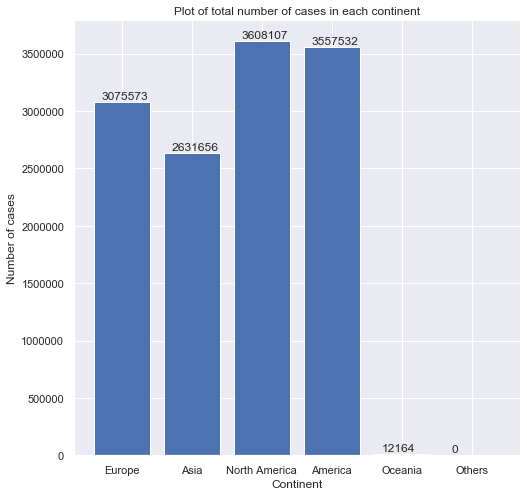

In [96]:
continents = ["Europe","Asia","North America","America","Oceania","Others"]
cases = [asia.cases.sum(),europe.cases.sum(),north_america.cases.sum(),america.cases.sum(),oceania.cases.sum(),others.cases.sum()]
plt.figure(figsize = (8,8))

plt.bar(continents,cases)
plt.ylabel("Number of cases")
plt.xlabel('Continent')
plt.title('Plot of total number of cases in each continent')
for i, j in enumerate(cases):
        plt.text(i-0.29,j+25000,str(j))

Its important to note that China stopped reporting there numbers

#### Total number of people who were infected by the virus globally

In [97]:
totalcases = asia.cases.sum()+europe.cases.sum()+north_america.cases.sum()+america.cases.sum()+oceania.cases.sum()+others.cases.sum()
totalcases

12885032

#### Total number of deaths globally

In [98]:
totaldeaths = asia.deaths.sum()+america.deaths.sum()+oceania.deaths.sum()+others.deaths.sum()+europe.deaths.sum()+north_america.deaths.sum()
totaldeaths

569841

#### Global fatality rate

In [99]:
global_fatality_rate = totaldeaths/totalcases
global_fatality_rate

0.044225035684816304

#### Time series plot of the state of the pandemic

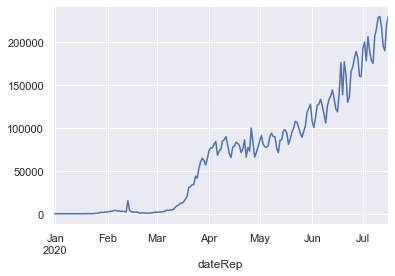

In [100]:
world.cases.resample('D').sum().plot()

#### Enter your country of choice to get all related stats:

In [101]:
choice = "Qatar"


In [102]:
country = world[world.countriesAndTerritories == choice]
country.rename(columns = {'countriesAndTerritories':'Country Name'},inplace = True)
country.head()

D:\Users\arjun\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day,month,year,cases,deaths,Country Name,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-07-16,16,7,2020,450,1,Qatar,QA,QAT,2832071.0,Asia,281.772597
2020-07-15,15,7,2020,517,1,Qatar,QA,QAT,2832071.0,Asia,298.191677
2020-07-14,14,7,2020,418,2,Qatar,QA,QAT,2832071.0,Asia,314.610757
2020-07-13,13,7,2020,470,1,Qatar,QA,QAT,2832071.0,Asia,324.320965
2020-07-12,12,7,2020,498,0,Qatar,QA,QAT,2832071.0,Asia,334.207723


Text(0.5, 1.0, ' Number of daily cases as it evolved through time')

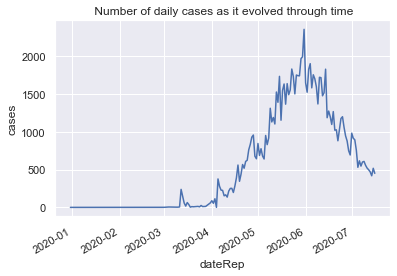

In [103]:
country.cases.plot()
plt.ylabel('cases')
country.cases.sum()
plt.title(' Number of daily cases as it evolved through time')

Text(0.5, 1.0, 'Number of deaths as it evolved through time')

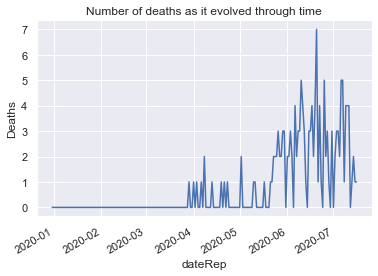

In [104]:
country.deaths.plot()
plt.ylabel('Deaths')
plt.title('Number of deaths as it evolved through time')

### Further Analysis:

An interesting parameter to check would be to see if there is a relation between the wealth of a country and the severity of the pandemic in the nation. 

We have to first process the data into an appropriate format so as to sudy the relation.



In [105]:
country_total = world.groupby(['countriesAndTerritories']).cases.sum()
test = pd.DataFrame(country_total)


In [106]:
test.reset_index(drop = True,inplace = True)
country_total = pd.concat((pd.Series(country_total.index),test),axis = 1)  
country_total.rename(columns = {'countriesAndTerritories':'CountryName'},inplace = True)
gdp = pd.read_excel("GDP.xls")
gdp2018 = pd.Series(gdp.iloc[:,-2])
countriesAndTerritories = pd.Series(gdp.iloc[:,0])
gdp = pd.concat((countriesAndTerritories,gdp2018),axis=1)
gdp.rename(columns = {'Country Name':'CountryName'},inplace = True)
gdp = gdp.dropna()
newdata = pd.merge(country_total,gdp,on ='CountryName',how ='left')
newdata.rename(columns = {'2018':'GDPpercapita'},inplace = True)
newdata = newdata.dropna()


Text(0.5, 1.0, 'Plot of GDP per capita VS Total coronavirus cases')

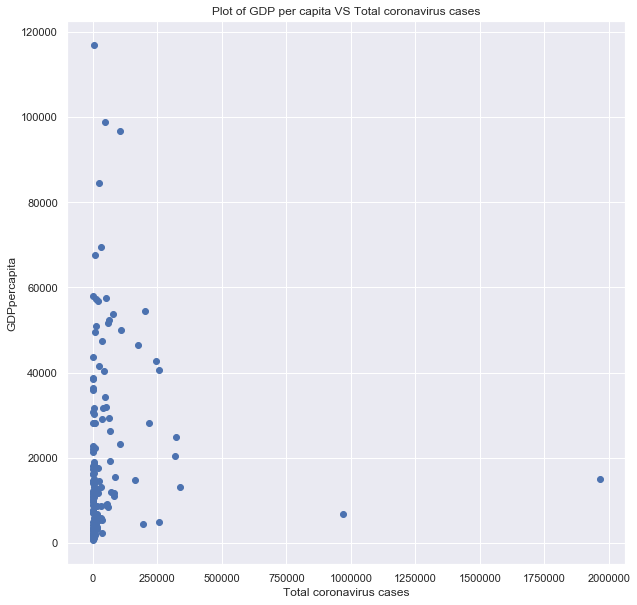

In [107]:
plt.figure(figsize = (10,10))
plt.scatter(newdata.cases,newdata.GDPpercapita)
plt.xlabel('Total coronavirus cases')
plt.ylabel('GDPpercapita')
plt.title('Plot of GDP per capita VS Total coronavirus cases')


#### Quick preliminary observations from the above plot:

Brazil and India (point beyond 1000000 and 400000 on the x axis respectively) are more sevely affected than others. The fact that these countries have a low GDP per capita also not an encouraging as this means that Brazil and India will have to battle the virus with limited resources. 

In the overall scope of the analysis, Brazil and India are outliers. Therefore, we remove them from our analysis to get better picture of the correlation between wealth and spread in a nation.

Text(0.5, 1.0, 'Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

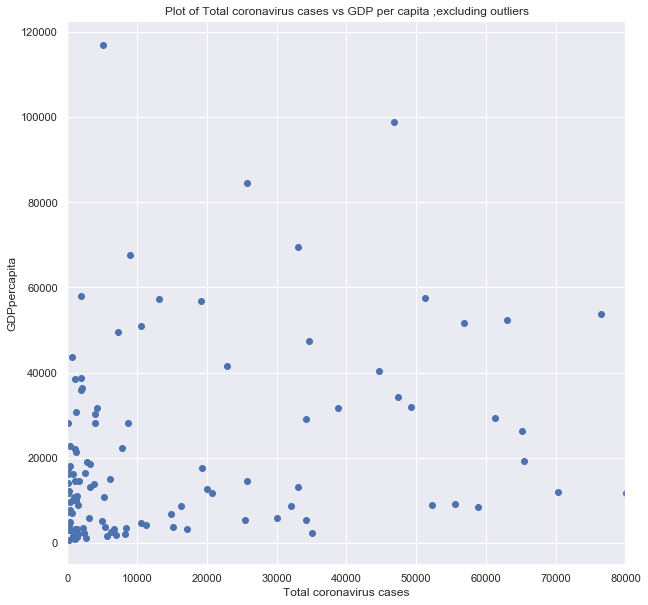

In [108]:
plt.figure(figsize = (10,10))
plt.scatter(newdata.cases,newdata.GDPpercapita)
plt.xlabel('Total coronavirus cases')
plt.ylabel('GDPpercapita')
plt.xlim(0,80000)

plt.title('Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

#### Quick preliminary observations from the above plot

On first look, there is no evident relation between the total number of coronavirus cases and the GDP per capita of a country. But to get a better understanding of any possible relation, we will run a KMeans algorithm and look for possible non-obvious clusters

Conclusion that can be drawn from observing the above plot are as follows:

1. The cluster towards the origin and high number of points with low x-values suggest that many countries have managed to limit the spread of the virus and they include both poor and rich countries. The spread of dispersed plots suggest that contrary for some others.



These conclusions have been drawn based on data available as on 23/06/2020 and may become invalid as the situation matures.

#### Note:

Since India and Brazil have unusually high number of cases, we will exclude these countries from our cluster analysis as they can skew the results

In [109]:
newdata1 = newdata[newdata.CountryName != 'Brazil']
newdata1 = newdata1[newdata1.CountryName != 'India']

In [110]:
kmeans = KMeans(n_clusters = 3)
newdata1['label'] = kmeans.fit_predict(newdata1[['cases']])

In [111]:
cluster1 = newdata1[newdata1.label == 0]
cluster2 = newdata1[newdata1.label == 1]
cluster3 = newdata1[newdata1.label == 2]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

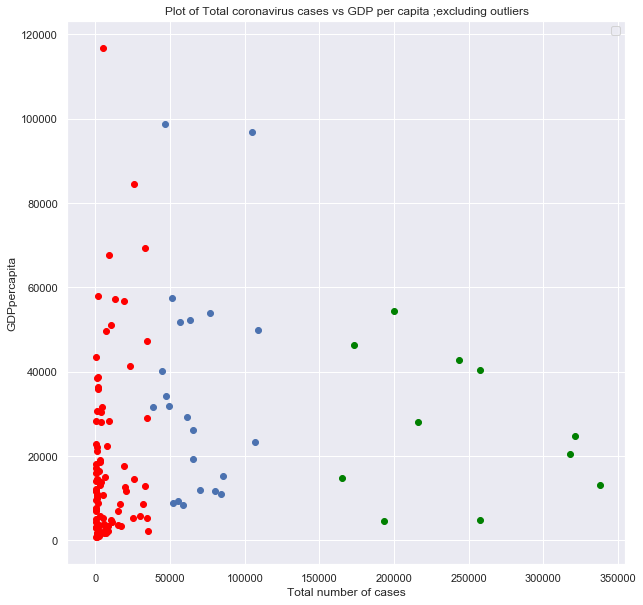

In [112]:
plt.figure(figsize = (10,10))
plt.scatter(cluster1.cases,cluster1.GDPpercapita)            
plt.scatter(cluster2.cases,cluster2.GDPpercapita,color = 'green') 
plt.scatter(cluster3.cases,cluster3.GDPpercapita,color = 'red')    
plt.xlabel('Total number of cases')
plt.ylabel('GDPpercapita')
plt.legend()
plt.title('Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

####  Observations from the above plot 

We have split the data into three distinct clusters (segregated by the color of the points on the plot) based on the degree of the spread of the virus. We can draw the following conclusions from the plot.

1. High gdp countries ( gdppercapita > 60000 ) have been very sucessful in containing the virus

2. High number of cases of the virus is seen only in medium gdppercapita countries( 20000 < gdppercapita < 60000) and low gdppercapita countries( gdppercapita < 20000 ). Even among these nations, most have managed to contain the virus well. 

These observations point out that some countries have been more affected than others. This variance of spread among countries maybe because of multiple reasons, which includes but not limited to, lack of proper measures, high population density, lack of complaince of the general public with laws enforced etc. 


##### Although most factors listed above cannot be quantified, we can investigate if population denisity is a factor that contributed to this spread. 



In [113]:
popdense = pd.read_excel('Popdense.xls')
popdense = popdense.iloc[:,[0,62]]


In [114]:
popdense.rename(columns = {'Country Name':'CountryName','2018':'Popdense'},inplace = True)


In [115]:
newdata2 = pd.merge(newdata1,popdense,how = 'inner',on = 'CountryName')


Text(0.5, 1.0, 'Plot of Total coronavirus cases vs Population denisity')

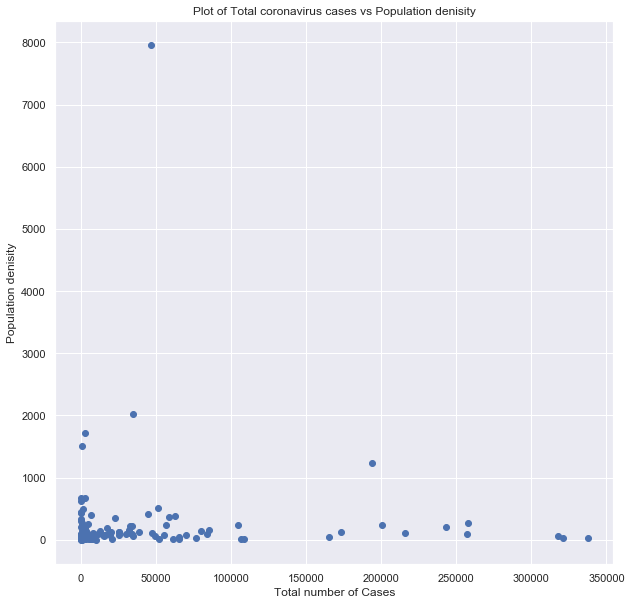

In [116]:
plt.figure(figsize=(10,10))
plt.scatter(newdata2.cases,newdata2.Popdense)
plt.xlabel('Total number of Cases')
plt.ylabel('Population denisity')
plt.title('Plot of Total coronavirus cases vs Population denisity')

#### Quick preliminary observations from the above plot 

It is interesting to note that Singapore, although it has a very high population denisity, has managed to do an excellent job in containing the virus. Together with this, Singapore is also an outlier owing to its population density and therefore we have to exclude it from further analysis  


In [117]:
newdata2 = newdata2[newdata2.CountryName != 'Singapore']
newdata2 = newdata2[newdata2.CountryName != 'Brazil']


Text(0.5, 1.0, 'Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')

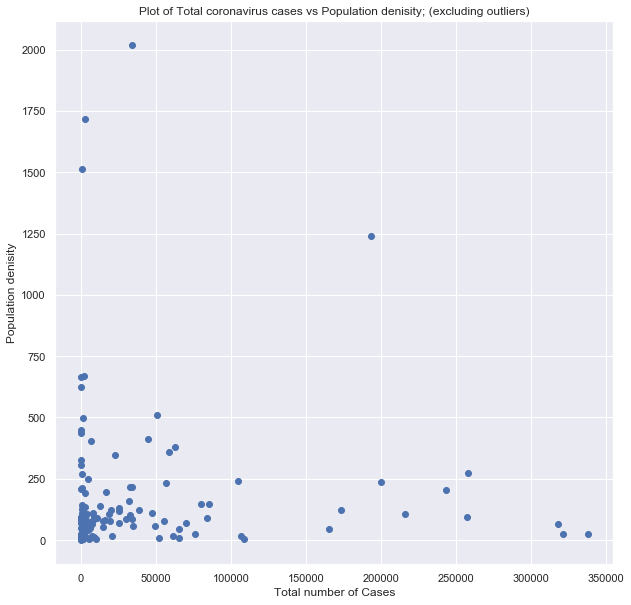

In [118]:
plt.figure(figsize = (10,10))
plt.scatter(newdata2.cases,newdata2.Popdense)
plt.xlabel('Total number of Cases')
plt.ylabel('Population denisity')
plt.title('Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')

In [119]:
popcluster1 = newdata2[newdata2.label == 0]
popcluster2 = newdata2[newdata2.label == 1]
popcluster3 = newdata2[newdata2.label == 2]

Text(0.5, 1.0, 'Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')

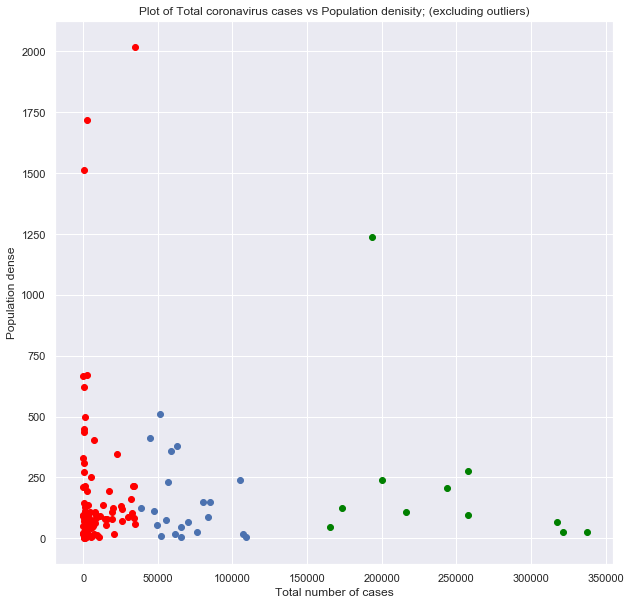

In [120]:
plt.figure(figsize = (10,10))
plt.scatter(popcluster1.cases,popcluster1.Popdense,)
plt.scatter(popcluster2.cases,popcluster2.Popdense,color = 'green')
plt.scatter(popcluster3.cases,popcluster3.Popdense,color = 'red')
plt.xlabel('Total number of cases')
plt.ylabel('Population dense')

plt.title('Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')

#### Quick preliminary observations from the above plot

We can draw the following conclusions from this plot:
1. There seems to be no percivable relation to the average population denisty of a nation and the actual spread of the data.
2. Certain countries with very high population denisity are doing very well compared to others .

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')

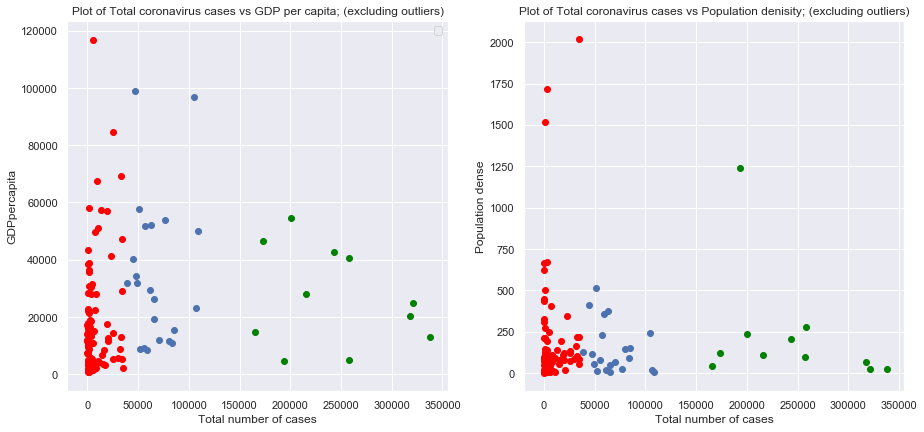

In [121]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)

plt.scatter(cluster1.cases,cluster1.GDPpercapita)            
plt.scatter(cluster2.cases,cluster2.GDPpercapita,color = 'green') 
plt.scatter(cluster3.cases,cluster3.GDPpercapita,color = 'red')    
plt.xlabel('Total number of cases')
plt.ylabel('GDPpercapita')
plt.title('Plot of Total coronavirus cases vs GDP per capita; (excluding outliers)')
plt.legend()

plt.subplot(2,2,2)

plt.scatter(popcluster1.cases,popcluster1.Popdense,)
plt.scatter(popcluster2.cases,popcluster2.Popdense,color = 'green')
plt.scatter(popcluster3.cases,popcluster3.Popdense,color = 'red')
plt.xlabel('Total number of cases')
plt.ylabel('Population dense')
plt.title('Plot of Total coronavirus cases vs Population denisity; (excluding outliers)')




#### Observations from the above plot and the answer to our initial question: Is there is a relation between the wealth of a country and the severity of the pandemic in the nation? 

1. The countries with high number of cases have low to medium GDPpercapita (0 < gdpPercapita < 60000) and low to medium population denisty(0 < popdensity < 500). 
2. Many countries in low to medium GDPpercapita and nd low to medium population denisty have contained the spread effectively
3. Some countries with very high population denisity have been extremely effective in containing the spread.

Building on the conclusions drawn earlier, these observations suggests that the virus had spread very drasticaly in some countries because they failed to implement preventive measures effectively in a timely fashion. 

These trends suggest that the only factor that can control the spread the virus is the efficacy of enforcements of preventive measures (social distancing, quarantine of effected individuals at the earliest etc.) in a nation. It is therefore the discipline of the people of a nation and effectiveness of policy implementation of the government that determines the state of the spread.

##### Note: These plots, however, fails to take into account the fact that the population denisity within a nation is varied and is concentrated in some places more than others. This fact might be significant to the conclusions drawn from this analysis.

Going further, it would be interesting to see if there is a relation between the fatality rate of a country and wealth of the nation.

In [122]:
newdata3 = pd.DataFrame()
newdata3 = pd.concat([world.countriesAndTerritories,world.deaths,world.cases], axis = 1)
newdata3.rename(columns = {'countriesAndTerritories':'CountryName'}, inplace = True)
totaldeath = pd.DataFrame(newdata3.groupby(['CountryName']).deaths.sum())
totaldeath.reset_index(drop = True,inplace = True)
totalcases = pd.DataFrame(newdata3.groupby(['CountryName']).cases.sum())
totalcases.reset_index(drop = True,inplace = True)
fatalityrate = pd.Series((totaldeath.deaths/totalcases.cases)*100)
deathrate = pd.concat([pd.Series(newdata2.CountryName.unique()),fatalityrate],axis = 1)
deathrate.rename(columns = {0:'CountryName',1:'FatalityRate'},inplace = 1)
newdata3=pd.merge(deathrate,gdp,how ='inner',on = 'CountryName')
newdata3.rename(columns = {'2018':'gdppercapita'},inplace = True)


Text(0.5, 1.0, 'Plot of Total number of fatalities vs Population denisity')

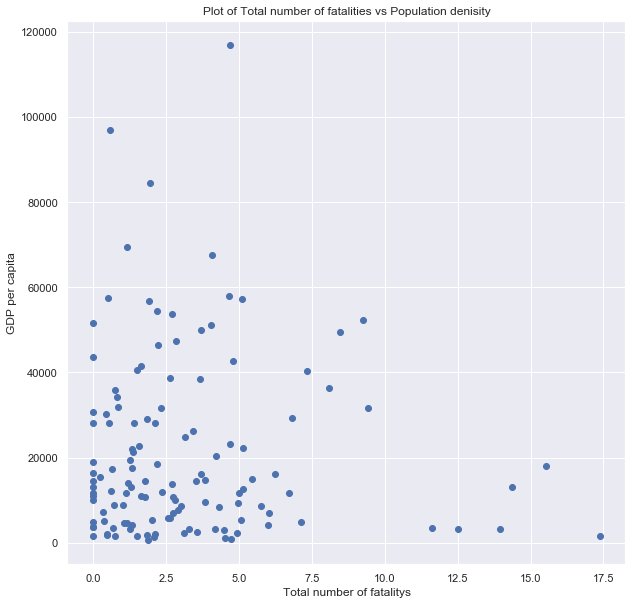

In [123]:
plt.figure(figsize = (10,10))
plt.scatter(newdata3.FatalityRate,newdata3.gdppercapita)
plt.xlabel('Total number of fatalitys')
plt.ylabel('GDP per capita')
plt.title('Plot of Total number of fatalities vs Population denisity')


 We will process the above plot a bit more before before we draw conclusions

In [124]:
kmeans = KMeans(n_clusters = 3)
newdata3 = pd.concat([newdata3,pd.Series(kmeans.fit_predict(newdata3[['FatalityRate']]))],axis = 1)


In [125]:
newdata3.rename(columns = {0:'label'},inplace = True)

In [126]:
dcluster1 = newdata3[newdata3.label == 0]
dcluster2 = newdata3[newdata3.label == 1]
dcluster3 = newdata3[newdata3.label == 2]

No handles with labels found to put in legend.


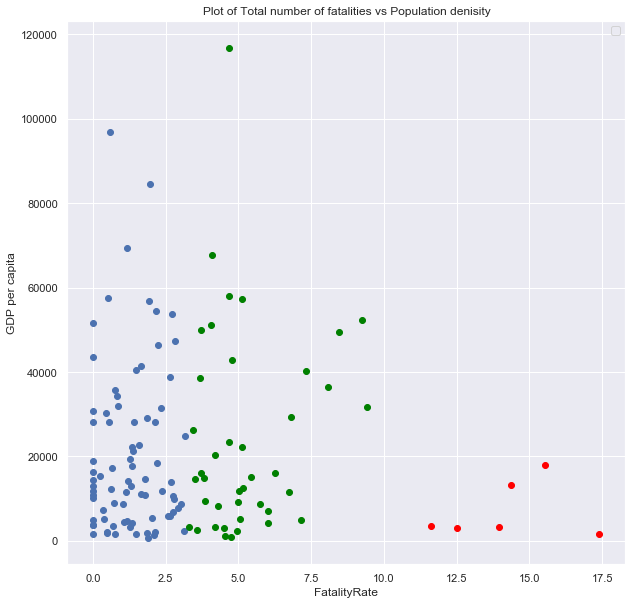

In [127]:
plt.figure(figsize = (10,10))
plt.scatter(dcluster1.FatalityRate,dcluster1.gdppercapita)
plt.scatter(dcluster2.FatalityRate,dcluster2.gdppercapita,color = 'green')
plt.scatter(dcluster3.FatalityRate,dcluster3.gdppercapita,color = 'red')
plt.xlabel('FatalityRate')
plt.ylabel('GDP per capita')
plt.title('Plot of Total number of fatalities vs Population denisity')
plt.legend()


#### Observations from the above plot and the answer to our initial question: Is there is a relation between the fatality rate of a country and wealth of the nation?
We observe the following from the above plot:
    1. High fatality rate is seen predominantly in countries with low gdp
    2. Rich countries(gdp per capita>60000) have low fatality rates
    3. Most countries have fatality rates between 0% and 7.5%

Although there is no cure for corona virus, it looks like the richer countries are doing a better job at caring for thier patients than the poorer ones. This shouldnt be suprising as wealthier countries have more resources at their disposal when compared to poorer countries.

### Conclusion:

1. The virus is spreading at a drastic pace around the world. Continent wise, Asia and North America are the most effected with Europe following suit. Oceania has been the least affected by the virus.

2. Country wise, Brazil has been the most affected country, followed by India. The situation in Brazil is particularly bad and we hope Brazil will be able to contain the virus the best it can.

3. The notion that rich countries have been more successful at controlling the virus than the poorer ones turns out to be somewhat true as there are not any cases of extreme spread in any wealthy nation. All cases of uncontrolled spread are in poorer countries although even among these nations, most have done a rather good job at controlling it.  In fact, it turns out, most nations have been successful at containing the virus to a large extent. 

4. Another important factor that contributes, theoretically to the spread of the virus, is population density. Popular opinion is that high population density can lead to larger spreads. Our analysis, however, paints a different picture. The population density showed little to no correlation with the extent of the spread in a nation. In fact, Singapore, the country with the highest population density has an exceptionally low number whereas countries with a comparatively less population density, have a profoundly serious spread of the virus. 

5. Rich countries are doing a better job at caring (resulting in lower mortality rates) for the patients than the poorer nations. This might be because of the better health infrastructure that these countries might be having. 
